In [1]:
using Distributions
using StatsPlots
using StatsBase

using StatisticalRethinking

# setting default attributes for plots
default(labels=false)

# Easy problems

Code 3.27

In [2]:
size = 1000
p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);
prob_data = [pdf(Binomial(9, p), 6) for p in p_grid];
posterior = prob_data .* prob_p
posterior /= sum(posterior);
cat = Categorical(posterior)
samples = p_grid[rand(cat, 10000)];

Solutions

In [3]:
println("3E1: ", sum(posterior[p_grid .< 0.2]))
println("3E2: ", sum(posterior[p_grid .> 0.8]))
println("3E3: ", sum(posterior[0.2 .< p_grid .< 0.8]))

c = cumsum(posterior);
println("3E4: ", p_grid[findfirst(c .> 0.2)])
println("3E5: ", p_grid[findfirst(c .> 0.8)])
println("3E6: ", hpdi(samples, alpha=0.34))
b = [p_grid[findfirst(c .> 0.34/2)], p_grid[findfirst(c .> 0.34/2 + 0.66)]]
println("3E7: ", b)

3E1: 0.0008560951294218477
3E2: 0.12034491402214353
3E3: 0.8787989908484344
3E4: 0.5165165165165165
3E5: 0.7607607607607607
3E6: [0.5345345345345346, 0.8048048048048048]
3E7: [0.4984984984984985, 0.7747747747747747]


# Medium problems

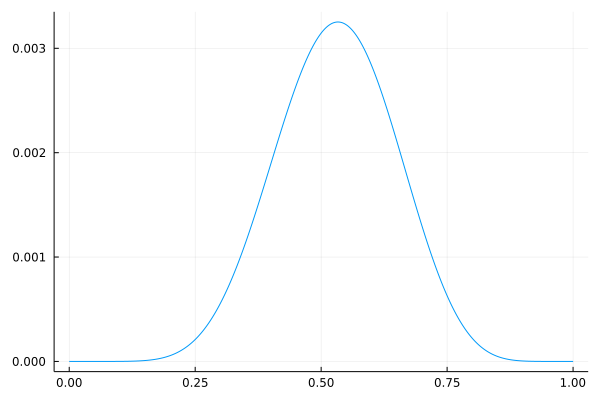

In [4]:
# 3M1
size = 1000
p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);
prob_data = [pdf(Binomial(15, p), 8) for p in p_grid];
posterior = prob_data .* prob_p
posterior /= sum(posterior);
plot(p_grid, posterior)

HPDI(90%): [0.3263263263263263, 0.7117117117117117]


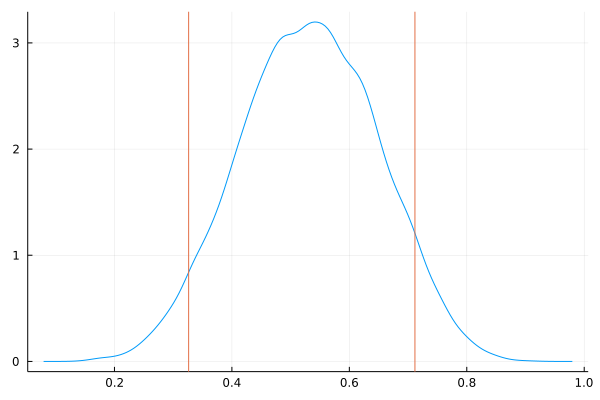

In [5]:
# 3M2
cat = Categorical(posterior)
samples = p_grid[rand(cat, 10_000)];
h = hpdi(samples, alpha=0.1)
println("HPDI(90%): ", h)
density(samples)
vline!(h)

In [6]:
# validation
hi1, hi2 = findfirst(p_grid .> h[1]), findfirst(p_grid .> h[2])
c = cumsum(posterior)
c[hi1], c[hi2]

(0.04509087956118796, 0.9414775535101587)

Probability of 8 waters is 0.146


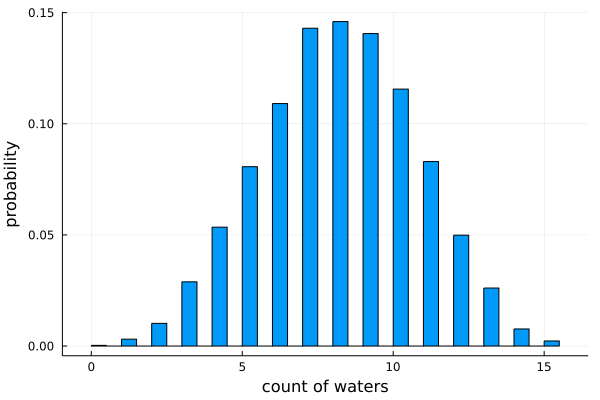

In [7]:
# 3M3
w = [rand(Binomial(15, p)) for p in samples];
props = proportions(w);
println("Probability of 8 waters is $(round(props[9], digits=4))")
histogram(w; normalize=:probability, xlabel="count of waters", ylabel="probability")

Probability of 6 waters is 0.1783


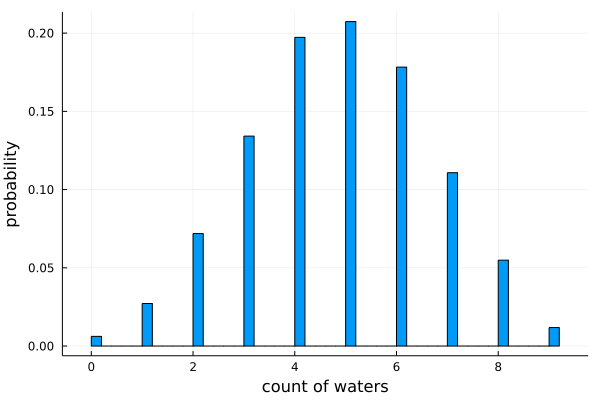

In [8]:
# 3M4
w = [rand(Binomial(9, p)) for p in samples];
props = proportions(w);
println("Probability of 6 waters is $(round(props[7], digits=4))")
histogram(w; normalize=:probability, xlabel="count of waters", ylabel="probability")

## 3M5 - step prior

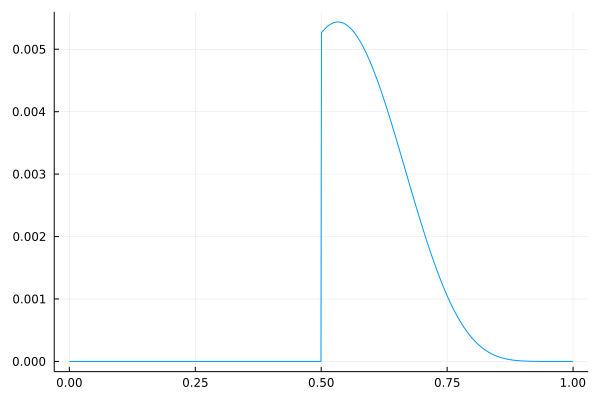

In [9]:
# 3M6
size = 1000
p_grid = range(0, 1; length=size)
prob_p = @. (p_grid >= 0.5) * 1.0
prob_data = [pdf(Binomial(15, p), 8) for p in p_grid];
posterior_step = prob_data .* prob_p
posterior_step /= sum(posterior_step);
plot(p_grid, posterior_step)

HPDI(90%): [0.5005005005005005, 0.7127127127127127]


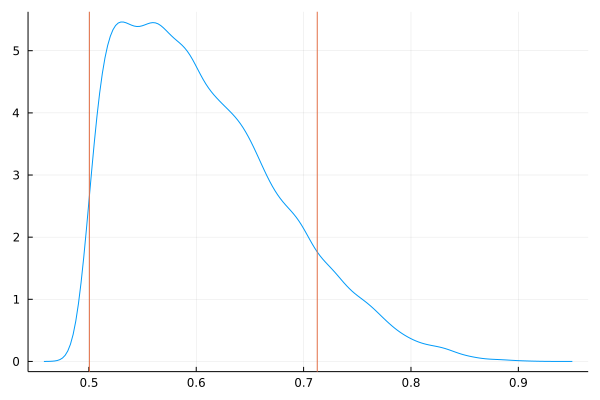

In [10]:
cat = Categorical(posterior_step)
samples_step = p_grid[rand(cat, 10_000)];
h = hpdi(samples_step, alpha=0.1)
println("HPDI(90%): ", h)
density(samples_step)
vline!(h)

In [11]:
# validation
hi1, hi2 = findfirst(p_grid .> h[1]), findfirst(p_grid .> h[2])
c = cumsum(posterior_step)
c[hi1], c[hi2]

(0.010536512588894261, 0.9039959054834312)

Probability of 8 waters is 0.1699


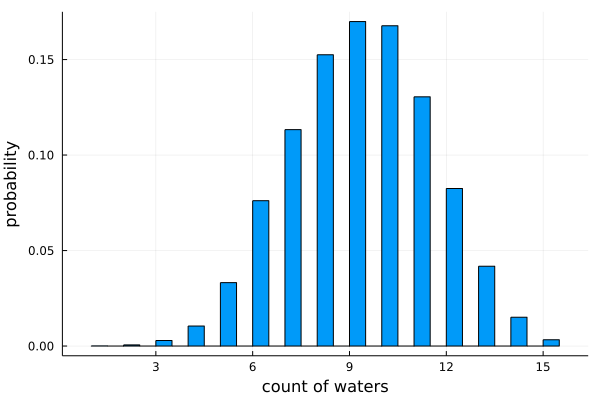

In [12]:
w = [rand(Binomial(15, p)) for p in samples_step];
props = proportions(w);
println("Probability of 8 waters is $(round(props[9], digits=4))")
histogram(w; normalize=:probability, xlabel="count of waters", ylabel="probability")

Probability of 6 waters is 0.1723


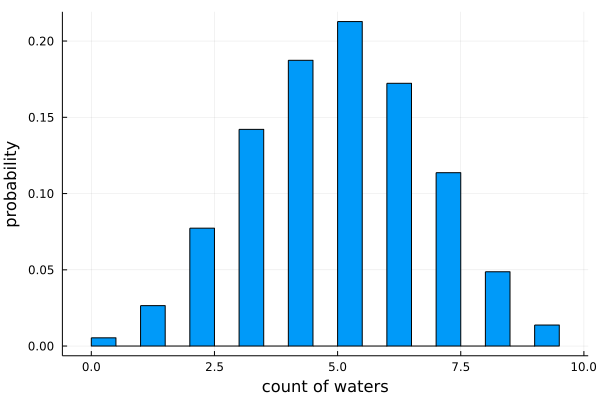

In [13]:
w = [rand(Binomial(9, p)) for p in samples];
props = proportions(w);
println("Probability of 6 waters is $(round(props[7], digits=4))")
histogram(w; normalize=:probability, xlabel="count of waters", ylabel="probability")

In [14]:
mean(samples), mean(samples_step)

(0.5313347347347347, 0.6065858858858859)

## 3M6 - 99% percentile

In [15]:
size = 1000
p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);

for tosses ∈ 10:10^5
    waters = div(tosses * 7, 10)
    prob_data = [pdf(Binomial(tosses, p), waters) for p in p_grid];
    posterior = prob_data .* prob_p
    posterior /= sum(posterior);
    cat = Categorical(posterior)
    samples = p_grid[rand(cat, 10_000)];
    h = hpdi(samples, alpha=0.01)
    if h[2] - h[1] < 0.05
        println("Need to do $tosses tosses")
        break
    end
end

Need to do 2081 tosses


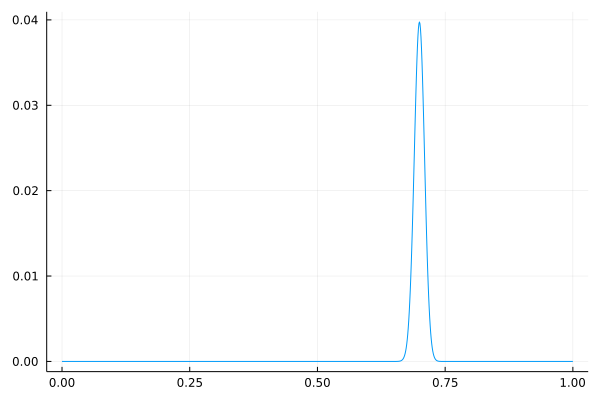

In [16]:
plot(p_grid, posterior)

HPDI(99%): [0.6736736736736737, 0.7227227227227228] dist = 0.049049049049049054


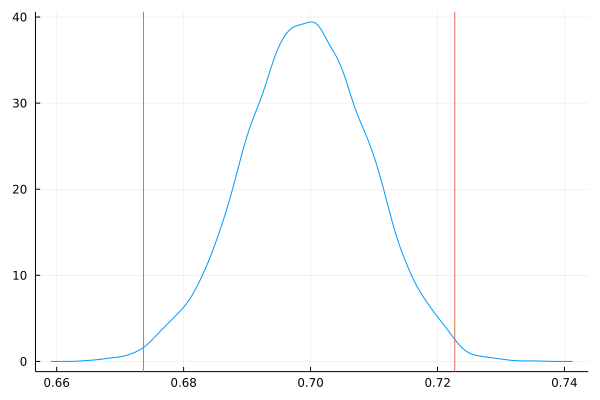

In [17]:
h = hpdi(samples, alpha=0.01)
println("HPDI(99%): ", h, " dist = ", h[2] - h[1])
density(samples)
vline!(h)

# Hard problems

Code 3.28

In [18]:
birth1 = [1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1]

birth2 = [0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0];

Code 3.30

In [19]:
sum(birth1) + sum(birth2)

111

## 3H1

Posterior probability of a birth being a boy. Assume uniform prior probability.

In [20]:
count_boys = sum(birth1) + sum(birth2)
count_total = length(birth1) + length(birth2)
count_boys/count_total

0.555

In [21]:
size = 1000
p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);
prob_data = [pdf(Binomial(count_total, p), count_boys) for p in p_grid];
posterior = prob_data .* prob_p
posterior /= sum(posterior);

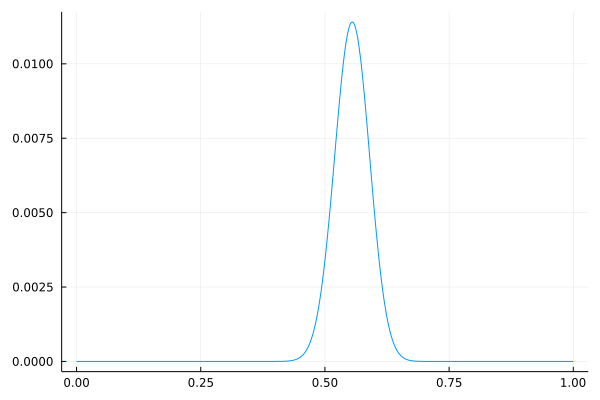

In [22]:
plot(p_grid, posterior)

## 3H2

In [23]:
cat = Categorical(posterior)
samples = p_grid[rand(cat, 10_000)];

In [24]:
h_50 = hpdi(samples, alpha=0.5)
h_89 = hpdi(samples, alpha=0.11)
h_97 = hpdi(samples, alpha=0.03);
println("HPDI(50%) = $h_50")
println("HPDI(89%) = $h_89")
println("HPDI(97%) = $h_97")

HPDI(50%) = [0.5305305305305306, 0.5775775775775776]
HPDI(89%) = [0.5005005005005005, 0.6126126126126126]
HPDI(97%) = [0.47647647647647645, 0.6276276276276276]


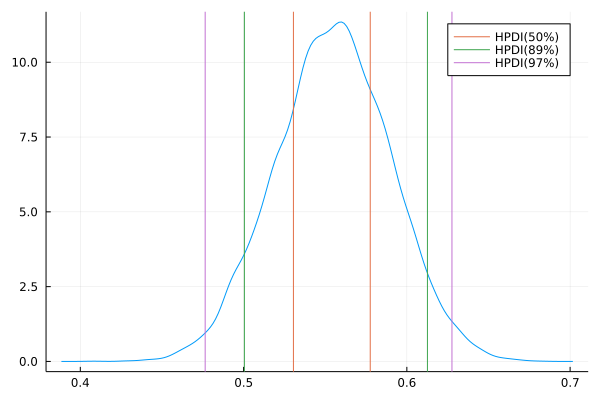

In [25]:
density(samples; label=false)
vline!(h_50; label="HPDI(50%)")
vline!(h_89; label="HPDI(89%)")
vline!(h_97; label="HPDI(97%)")

## 3H3

In [26]:
b = Binomial(count_total, count_boys/count_total)
sim = rand(b, 10_000);

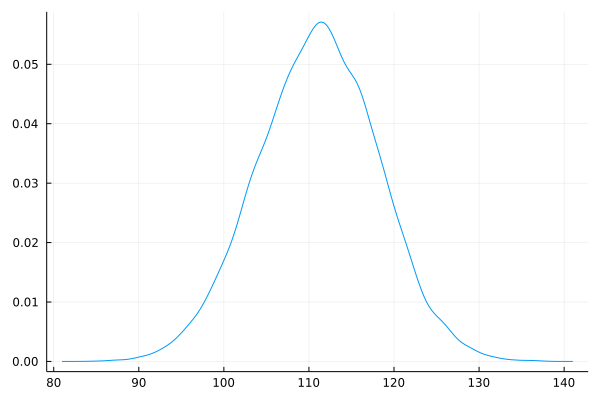

In [27]:
density(sim)

## 3H4

In [28]:
count_boys1 = sum(birth1)
count_total1 = length(birth1)
count_boys1, count_total1, count_boys1/count_total1

(51, 100, 0.51)

In [29]:
200*0.51

102.0